In [1]:
### Load relevant packages
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as smf
import statsmodels.api         as sm
import scipy
import psycopg2 as pg2
%matplotlib inline
plt.style.use('ggplot')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import pandas_profiling

# Data Preprocessing

In [2]:
# Load dataset
df = pd.read_excel('pharma_trade_indicators.xls')
df

,Exporters,Value exported in 2019 (USD thousand),Trade balance in 2019 (USD thousand),Annual growth in value between 2015-2019 (%),Annual growth in value between 2018-2019 (%),Share in world exports (%),CO2 emission (tons),Average distance of importing countries (km),Concentration of importing countries,Ease of doing business ranking,Unnamed: 10
0,Germany,89227214,32519888,6.0,-7.0,14.1,283222.0,3572.0,0.07,24.0,0.140567
1,Switzerland,83047883,51485644,8.0,10.0,13.1,NaN,4700.0,0.11,38.0,0.152230
2,Belgium,53608528,7212172,6.0,13.0,8.4,127130.0,3834.0,0.09,45.0,0.115912
3,United States of America,53561670,-74676311,3.0,11.0,8.4,529696.0,7744.0,0.06,8.0,0.130995
4,Ireland,53555313,45340758,17.0,1.0,8.4,40714.0,4083.0,0.23,23.0,0.150723
...,...,...,...,...,...,...,...,...,...,...,...
202,Cook Islands,1,-452,NaN,NaN,0.0,NaN,3206.0,1.00,NaN,0.200000
203,Mozambique,1,-210966,0.0,-100.0,0.0,NaN,NaN,NaN,135.0,0.250000
204,Mauritania,1,-49982,NaN,NaN,0.0,NaN,NaN,NaN,148.0,0.333333
205,Sint Maarten (Dutch part),1,-5948,-45.0,NaN,0.0,NaN,NaN,1.00,NaN,0.500000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Exporters                                     207 non-null    object 
 1   Value exported in 2019 (USD thousand)         207 non-null    int64  
 2   Trade balance in 2019 (USD thousand)          207 non-null    int64  
 3   Annual growth in value between 2015-2019 (%)  203 non-null    float64
 4   Annual growth in value between 2018-2019 (%)  193 non-null    float64
 5   Share in world exports (%)                    207 non-null    float64
 6   CO2 emission (tons)                           29 non-null     float64
 7   Average distance of importing countries (km)  194 non-null    float64
 8   Concentration of importing countries          203 non-null    float64
 9   Ease of doing business ranking                172 non-null    flo

In [5]:
#Create a profile report
#profile = df.profile_report()
#profile.to_file("Exports_data_profiling.html")

In [6]:
#Replace Nan values with zero
df.fillna(0, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Exporters                                     207 non-null    object 
 1   Value exported in 2019 (USD thousand)         207 non-null    int64  
 2   Trade balance in 2019 (USD thousand)          207 non-null    int64  
 3   Annual growth in value between 2015-2019 (%)  207 non-null    float64
 4   Annual growth in value between 2018-2019 (%)  207 non-null    float64
 5   Share in world exports (%)                    207 non-null    float64
 6   CO2 emission (tons)                           207 non-null    float64
 7   Average distance of importing countries (km)  207 non-null    float64
 8   Concentration of importing countries          207 non-null    float64
 9   Ease of doing business ranking                207 non-null    flo

In [13]:
#Check descriptive statistics
df.describe()

,Value exported in 2019 (USD thousand),Trade balance in 2019 (USD thousand),Annual growth in value between 2015-2019 (%),Annual growth in value between 2018-2019 (%),Share in world exports (%),CO2 emission (tons),Average distance of importing countries (km),Concentration of importing countries,Ease of doing business ranking,Unnamed: 10,log_distance
count,2.070000e+02,2.070000e+02,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,3.066514e+06,-1.347205e+05,29.386473,168.599034,0.480193,7913.164251,4173.927536,0.410966,75.811594,0.096642,-inf
std,1.174429e+07,8.150828e+06,122.727045,1176.316238,1.849861,45147.600650,3704.320267,0.304849,60.261471,0.078310,NaN
min,1.000000e+00,-7.467631e+07,-88.000000,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.053705,-inf
25%,7.900000e+01,-4.929685e+05,-8.000000,-11.000000,0.000000,0.000000,1530.500000,0.140000,17.500000,0.067639,7.332888
50%,5.184000e+03,-1.429270e+05,4.000000,3.000000,0.000000,0.000000,3253.000000,0.340000,71.000000,0.078369,8.087333
75%,3.132140e+05,-1.537800e+04,19.000000,24.500000,0.050000,0.000000,5253.500000,0.600000,127.500000,0.100772,8.566619
max,8.922721e+07,5.148564e+07,1079.000000,15053.000000,14.100000,529696.000000,16537.000000,1.000000,190.000000,1.000000,9.713356


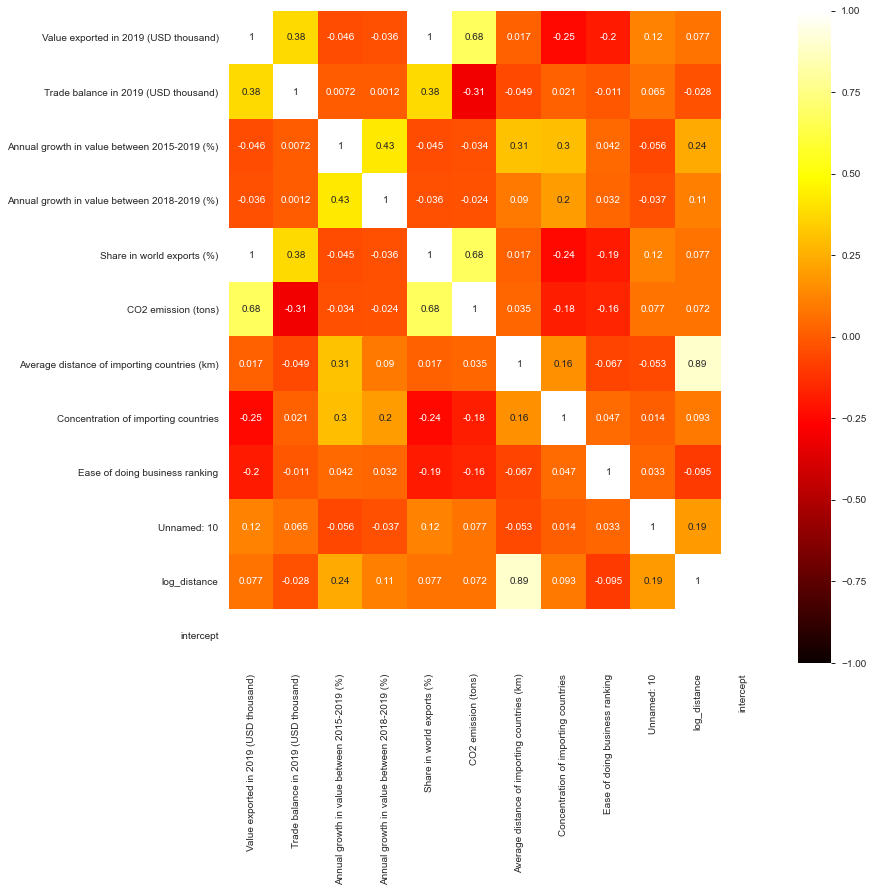

In [58]:
#PLot heatmap to see correlation between 2 variables
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, center= 0, cmap= 'hot', annot = True);

In [42]:
#Create new dataframe with selected columns 
df1 = df[['Exporters', 'Value exported in 2019 (USD thousand)' , 'Share in world exports (%)', 'Concentration of importing countries']]

In [43]:
#Rename columns
df1.rename(columns = {'Value exported in 2019 (USD thousand)': 'value_exported', 'Share in world exports (%)': 'world_share',
                      'Concentration of importing countries': 'market_concentration'}, inplace = True)

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Exporters             207 non-null    object 
 1   value_exported        207 non-null    int64  
 2   world_share           207 non-null    float64
 3   market_concentration  207 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.6+ KB


In [59]:
#Remove countries with zero share in world exports
df1.query('world_share == 0')
df1.drop(df1[df1['world_share'] == 0].index, inplace = True) 

In [47]:
df1.head()

,Exporters,value_exported,world_share,market_concentration
0,Germany,89227214,14.1,0.07
1,Switzerland,83047883,13.1,0.11
2,Belgium,53608528,8.4,0.09
3,United States of America,53561670,8.4,0.06
4,Ireland,53555313,8.4,0.23


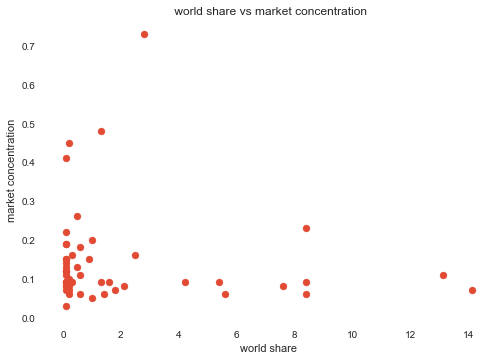

In [60]:
#Plot scatterplot betweem world share and market concentration
plt.scatter(x = df1.world_share, y = df1.market_concentration)
plt.title(" world share vs market concentration")
plt.xlabel('world share')
plt.ylabel( 'market concentration');

# Linear regression for all the countries

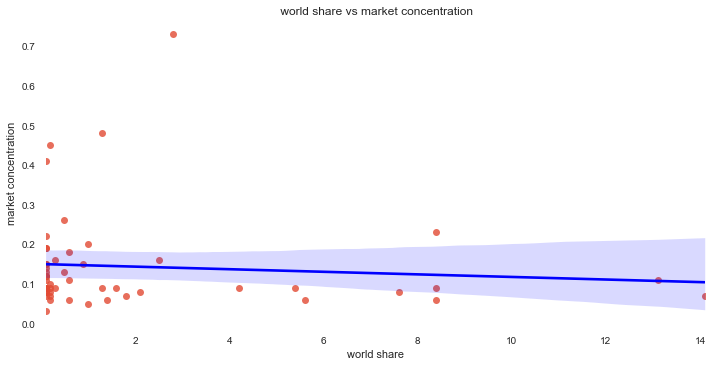

In [61]:
## Plot linear regression between world share and market concentration
sns.lmplot(x='world_share',y='market_concentration',data= df1, 
           line_kws = {'color': "blue"},aspect= 2)
plt.title(" world share vs market concentration")
plt.xlabel('world share')
plt.ylabel( 'market concentration');

In [30]:
#Linear Regression results for all countries
df1['intercept'] = 1

lm = sm.OLS(df1['market_concentration'], df1[['intercept', 'world_share']])
results = lm.fit()
summary  = results.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     market_concentration   R-squared:                       0.008
Model:                              OLS   Adj. R-squared:                 -0.012
Method:                   Least Squares   F-statistic:                    0.3791
Date:                  Wed, 22 Apr 2020   Prob (F-statistic):              0.541
Time:                          14:01:11   Log-Likelihood:                 35.181
No. Observations:                    52   AIC:                            -66.36
Df Residuals:                        50   BIC:                            -62.46
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.1497      0.020      7.440      0.000       0.109       0.190
world_share    -0.0033      0.005     -0.616      0.541      -0.014       0.007
==============================================================================
Omnibus:                       54.714   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.838
Skew:                           2.900   Prob(JB):                     8.42e-58
Kurtosis:                      12.363   Cond. No.                         4.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Regression for world's top countries in exports share

In [52]:
top_share = df1.query('world_share >= 5').reset_index()
top_share

,index,Exporters,value_exported,world_share,market_concentration
0,0,Germany,89227214,14.1,0.07
1,1,Switzerland,83047883,13.1,0.11
2,2,Belgium,53608528,8.4,0.09
3,3,United States of America,53561670,8.4,0.06
4,4,Ireland,53555313,8.4,0.23
5,5,Netherlands,48351244,7.6,0.08
6,6,France,35554964,5.6,0.06
7,7,Italy,34123303,5.4,0.09


In [54]:
#Linear regression results for world's top exports share countries
top_share['intercept'] = 1

lm = sm.OLS(top_share['market_concentration'], top_share[['intercept', 'world_share']])
results = lm.fit()
summary  = results.summary()
summary

/Users/sj/anaconda3/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=8



<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     market_concentration   R-squared:                       0.001
Model:                              OLS   Adj. R-squared:                 -0.166
Method:                   Least Squares   F-statistic:                  0.005919
Date:                  Wed, 22 Apr 2020   Prob (F-statistic):              0.941
Time:                          14:07:55   Log-Likelihood:                 12.294
No. Observations:                     8   AIC:                            -20.59
Df Residuals:                         6   BIC:                            -20.43
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.0939      0.067      1.399      0.211      -0.070       0.258
world_share     0.0006      0.007      0.077      0.941      -0.017       0.018
==============================================================================
Omnibus:                       16.560   Durbin-Watson:                   2.556
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.348
Skew:                           1.889   Prob(JB):                       0.0418
Kurtosis:                       5.186   Cond. No.                         29.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

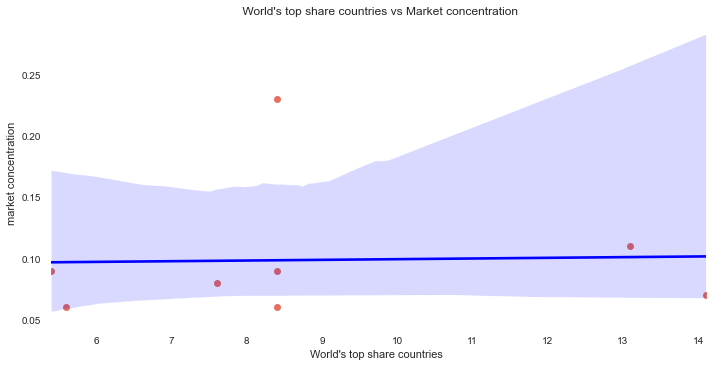

In [64]:
## Plot linear regression between world share and market concentration
sns.lmplot(x='world_share',y='market_concentration',data= top_share, 
           line_kws = {'color': "blue"},aspect= 2)
plt.title(" World's top share countries vs Market concentration")
plt.xlabel("World's top share countries ")
plt.ylabel( 'market concentration');

# Linear Regression for countries other than world's top countries in exports share

In [66]:
bottom_share = df1.query('world_share < 5').reset_index()
bottom_share

,index,Exporters,value_exported,world_share,market_concentration
0,8,United Kingdom,26928329,4.2,0.09
1,9,Denmark,17545114,2.8,0.73
2,10,India,16124969,2.5,0.16
3,11,Spain,13050024,2.1,0.08
4,12,Austria,11460667,1.8,0.07
5,13,Sweden,10229516,1.6,0.09
6,14,China,9165509,1.4,0.06
7,15,Canada,8451149,1.3,0.48
8,16,Singapore,8107010,1.3,0.09
9,17,Hungary,6489549,1.0,0.05


In [55]:
#Linear regression results for world's bottom exports share countries
bottom_share['intercept'] = 1

lm = sm.OLS(bottom_share['market_concentration'], bottom_share[['intercept', 'world_share']])
results = lm.fit()
summary  = results.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     market_concentration   R-squared:                       0.045
Model:                              OLS   Adj. R-squared:                  0.022
Method:                   Least Squares   F-statistic:                     1.982
Date:                  Wed, 22 Apr 2020   Prob (F-statistic):              0.167
Time:                          14:08:17   Log-Likelihood:                 28.098
No. Observations:                    44   AIC:                            -52.20
Df Residuals:                        42   BIC:                            -48.63
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.1312      0.024      5.362      0.000       0.082       0.181
world_share     0.0316      0.022      1.408      0.167      -0.014       0.077
==============================================================================
Omnibus:                       34.551   Durbin-Watson:                   2.281
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.266
Skew:                           2.168   Prob(JB):                     2.26e-18
Kurtosis:                       8.052   Cond. No.                         1.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

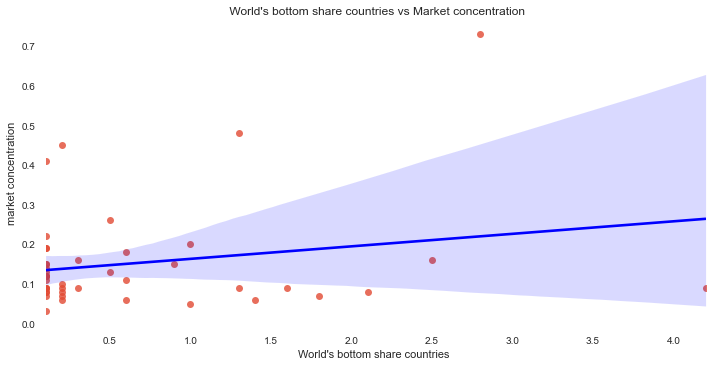

In [65]:
## Plot linear regression between world share and market concentration
sns.lmplot(x='world_share',y='market_concentration',data= bottom_share, 
           line_kws = {'color': "blue"},aspect= 2)
plt.title(" World's bottom share countries vs Market concentration")
plt.xlabel("World's bottom share countries ")
plt.ylabel( 'market concentration');